# Iteration 1

In [2]:
def IFPE_Regression(X_train, y_train, X_test, y_test, regressor, deg=None):
    
    ### INSTANTIATE THE MODEL

    ## LINEAR MODELS

    # ordinary least squares
    if regressor == 'linear':
        from sklearn.linear_model import LinearRegression
        reg = LinearRegression()
    
    # ridge regression
    elif regressor == 'ridge':
        from sklearn.linear_model import Ridge
        reg = Ridge(random_state=0)

    # lasso regression
    elif regressor == 'lasso':
        from sklearn.linear_model import Lasso
        reg = Lasso(random_state=0)

    # polynomial linear regression - need to add polynomial features first
    # https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/
    # https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions
    elif regressor == 'polynomial':
        from sklearn.linear_model import LinearRegression
        from sklearn.preprocessing import PolynomialFeatures
        poly = PolynomialFeatures(degree = deg)
        X_poly_train = poly.fit_transform(X_train)
        X_poly_test = poly.fit_transform(X_test)
        X_train = X_poly_train
        X_test = X_poly_test

        # poly.fit(X_poly, y_train)
        reg = LinearRegression()

    # stochastic gradient descent
    elif regressor == 'sgd':
        from sklearn.linear_model import SGDRegressor
        reg = SGDRegressor(random_state=0)
    
    ## SUPPORT VECTOR MACHINES

    # SVM regression https://scikit-learn.org/stable/modules/svm.html#regression
    elif regressor == 'svm':
        from sklearn import svm
        reg = svm.SVR()

    ## DECISION TREES

    # decision tree
    elif regressor == 'dt':
        from sklearn import tree
        reg = tree.DecisionTreeRegressor(random_state=0)

    ## ENSEMBLE METHODS

    # random forest
    elif regressor =='rf':
        from sklearn.ensemble import RandomForestRegressor
        reg = RandomForestRegressor(max_depth=2, random_state=0)

    # gradient boost
    elif regressor =='gb':
        from sklearn.ensemble import GradientBoostingRegressor
        reg = GradientBoostingRegressor(random_state=0)

    # voting regressor
    elif regressor =='vr':
        from sklearn.ensemble import GradientBoostingRegressor
        from sklearn.ensemble import RandomForestRegressor
        from sklearn.linear_model import LinearRegression
        from sklearn.ensemble import VotingRegressor
        reg1 = GradientBoostingRegressor(random_state=1)
        reg2 = RandomForestRegressor(random_state=1)
        reg3 = LinearRegression()
        reg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])

    # xgboost
    elif regressor == 'xgb':
        import xgboost as xgb
        reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=0)



    ### FIT THE MODEL

    reg.fit(X_train, y_train)




    ### PREDICT THE RESPONSE FOR THE TEST DATASET

    y_pred = reg.predict(X_test)




    ### EVALUATE THE MODEL

    # Mean Absolute Error
    from sklearn.metrics import mean_absolute_error
    MAE = mean_absolute_error(y_test, y_pred)

    # Root Mean Square Error
    from sklearn.metrics import mean_squared_error
    RMSE = mean_squared_error(y_test, y_pred, squared=False)

    # r2
    from sklearn.metrics import r2_score
    r2 = r2_score(y_test, y_pred)

    # Adjusted r2
    n = len(X_test)
    p = len(X_test[0,:])

    Adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

    ### COMPARE MODELS
    
    import pandas as pd
    model_comparison = pd.DataFrame({
        'Mean Absolute Error': MAE,
        'Root Mean Square Error': RMSE,
        'R Squared': r2,
        'Adjusted R Squared': Adj_r2
    }, index  = [str(regressor)])
    
    return model_comparison

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set() # Setting seaborn as default style even if use only matplotlib
pd.set_option('display.max_rows', None)

In [3]:
df_flights = pd.read_csv(r'..\flight_data_clean.csv', sep=',')
df_flights = df_flights.drop('Unnamed: 0', axis=1)
df_flights.head()

,mkt_carrier,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,arr_delay,year,month,day
0,9,5431,1253,5431,12889,13851,1930,2350,140,986,19.0,2018,1,1
1,9,989,1238,989,12889,13871,2125,155,150,1099,46.0,2018,1,1
2,9,1664,3796,1664,12889,13871,650,1120,150,1099,-9.0,2018,1,1
3,9,1106,3562,1106,12889,13891,735,830,55,197,-3.0,2018,1,1
4,9,1559,2065,1559,12889,13891,1740,1835,55,197,37.0,2018,1,1


In [4]:
X = df_flights.drop('arr_delay',axis=1).to_numpy()
y = df_flights['arr_delay'].to_numpy()

In [5]:
def split_data(data, target=None, percent_test=0.3, dtype='array'):
    # Import train_test_split function
    from sklearn.model_selection import train_test_split

    # Split dataset into training set and test set
    if dtype == 'array':      
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=percent_test,random_state=10)
    
        print(f'X_train shape: {X_train.shape}')
        print(f'X_test shape: {X_test.shape}')
        print(f'y_train shape: {y_train.shape}')
        print(f'y_test shape: {y_test.shape}')
    
        return X_train, X_test, y_train, y_test
    
    if dtype == 'df':
        df_train, df_test = train_test_split(data, test_size=percent_test,random_state=10)

        print(f'df_train shape: {df_train.shape}')
        print(f'df_test shape: {df_test.shape}')
    
        return df_train, df_test

In [6]:
X_train, X_test, y_train, y_test = split_data(data=X, target=y)

X_train shape: (69377, 13)
X_test shape: (29733, 13)
y_train shape: (69377,)
y_test shape: (29733,)


In [8]:
model_comparison_linear = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='linear', deg=None)
model_comparison_linear

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
linear,24.238396,48.88619,0.008231,0.007797


In [9]:
model_comparison_ridge = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='ridge', deg=None)
model_comparison_ridge

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
ridge,24.238396,48.88619,0.008231,0.007797


In [10]:
model_comparison_lasso = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='lasso', deg=None)
model_comparison_lasso

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
lasso,24.226039,48.883017,0.008359,0.007926


In [11]:
model_comparison_poly2 = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='polynomial', deg=2)
model_comparison_poly2

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,24.257671,49.305122,-0.00884,-0.012416


In [12]:
model_comparison_poly3 = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='polynomial', deg=3)
model_comparison_poly3

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,2.933144e+07,2.862203e+09,-3.399689e+15,-3.464951e+15


In [13]:
model_comparison_sgd = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='sgd', deg=None)
model_comparison_sgd

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
sgd,2.971017e+16,2.996987e+16,-3.727419e+29,-3.729049e+29


In [14]:
# model_comparison_svm = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='svm', deg=None)
# model_comparison_svm

In [15]:
model_comparison_dt = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='dt', deg=None)
model_comparison_dt

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
dt,35.270474,73.538842,-1.244254,-1.245235


In [16]:
model_comparison_rf = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='rf', deg=None)
model_comparison_rf

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
rf,24.201394,48.845569,0.009878,0.009445


In [17]:
model_comparison_gb = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='gb', deg=None)
model_comparison_gb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
gb,23.995052,48.603529,0.019666,0.019237


In [18]:
model_comparison_vr = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='vr', deg=None)
model_comparison_vr

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
vr,24.308494,48.46062,0.025423,0.024996


In [19]:
model_comparison_xgb = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='xgb', deg=None)
model_comparison_xgb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
xgb,24.369545,49.28845,-0.008158,-0.008599


In [20]:
model_comparison = pd.concat([model_comparison_linear,model_comparison_ridge,model_comparison_lasso,model_comparison_poly2,model_comparison_poly3,model_comparison_sgd,model_comparison_dt,model_comparison_rf,model_comparison_gb,model_comparison_vr,model_comparison_xgb])


In [21]:
model_comparison.sort_values('R Squared', ascending=False)

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
vr,2.430849e+01,4.846062e+01,2.542273e-02,2.499642e-02
gb,2.399505e+01,4.860353e+01,1.966628e-02,1.923745e-02
rf,2.420139e+01,4.884557e+01,9.878050e-03,9.444940e-03
lasso,2.422604e+01,4.888302e+01,8.359303e-03,7.925529e-03
ridge,2.423840e+01,4.888619e+01,8.230557e-03,7.796726e-03
linear,2.423840e+01,4.888619e+01,8.230551e-03,7.796721e-03
xgb,2.436955e+01,4.928845e+01,-8.158130e-03,-8.599129e-03
polynomial,2.425767e+01,4.930512e+01,-8.840289e-03,-1.241568e-02
dt,3.527047e+01,7.353884e+01,-1.244254e+00,-1.245235e+00
polynomial,2.933144e+07,2.862203e+09,-3.399689e+15,-3.464951e+15


In [22]:
regressor_list = ['linear', 'ridge', 'lasso']

In [23]:
for regressor in regressor_list:
    df_list = []
    df_list.append(f'model_comparison_{regressor}')
    print(df_list)

['model_comparison_linear']
['model_comparison_ridge']
['model_comparison_lasso']


In [24]:
for regressor in regressor_list:
    df_list = []
    df_list.append(f'model_comparison_{regressor}')
    
for regressor in regressor_list:
    for model in df_list:
        model = IFPE_Regression(X_train, y_train, X_test, y_test, regressor=regressor, deg=None)
        print(model)

        Mean Absolute Error  Root Mean Square Error  R Squared  \
linear            24.238396                48.88619   0.008231   

        Adjusted R Squared  
linear            0.007797  
       Mean Absolute Error  Root Mean Square Error  R Squared  \
ridge            24.238396                48.88619   0.008231   

       Adjusted R Squared  
ridge            0.007797  
       Mean Absolute Error  Root Mean Square Error  R Squared  \
lasso            24.226039               48.883017   0.008359   

       Adjusted R Squared  
lasso            0.007926  


# Iteration 2

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [28]:
scaler.fit(X_train)

StandardScaler()

In [29]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=df_flights.drop('arr_delay',axis=1).columns)

In [31]:
X_train_scaled_df.head()

,mkt_carrier,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day
0,0.208004,-1.096988,-1.750563,-1.096814,0.744017,1.387920,-0.613159,-0.303390,0.560798,0.624300,-1.033586,-1.351274,0.151131
1,-1.210108,-0.525117,-0.186366,-0.525066,-1.071240,-0.636318,0.207337,0.278311,-0.289901,-0.244970,0.967505,0.985814,-0.074264
2,-0.926485,0.421909,-1.414128,0.421756,-0.691181,1.333747,0.774113,0.654477,-0.889575,-0.786985,-1.033586,-0.474866,1.616201
3,-1.210108,0.521879,1.383476,0.521704,0.808124,-0.445389,-0.355348,-0.264610,-1.196385,-1.088672,0.967505,-1.059138,0.714620
4,1.058871,0.483718,0.050719,0.483552,0.933720,-0.688509,0.471287,0.483845,-0.610657,-0.778462,-1.033586,0.985814,-0.186961


<AxesSubplot: >

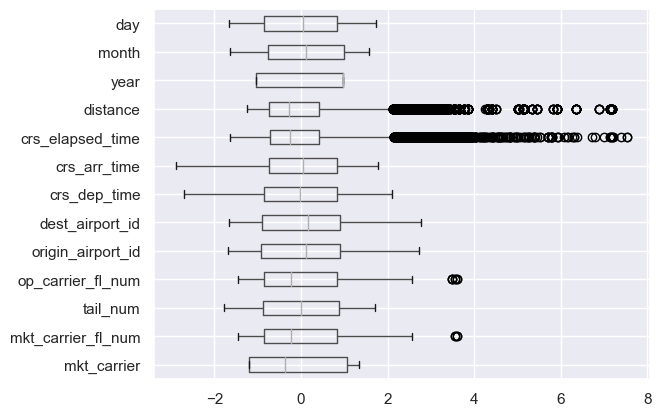

In [32]:
X_train_scaled_df.boxplot(vert=False)

In [33]:
model_comparison_linear = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='linear', deg=None)
model_comparison_linear

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
linear,24.238396,48.88619,0.008231,0.007797


In [34]:
model_comparison_ridge = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='ridge', deg=None)
model_comparison_ridge

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
ridge,24.238389,48.886183,0.008231,0.007797


In [35]:
model_comparison_lasso = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='lasso', deg=None)
model_comparison_lasso

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
lasso,24.226932,48.897021,0.007791,0.007357


In [36]:
model_comparison_poly2 = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='polynomial', deg=2)
model_comparison_poly2

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,1.176215e+10,1.597180e+12,-1.058635e+21,-1.062387e+21


In [ ]:
model_comparison_poly3 = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='polynomial', deg=3)
model_comparison_poly3

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,2.933144e+07,2.862203e+09,-3.399689e+15,-3.464951e+15


In [37]:
model_comparison_sgd = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='sgd', deg=None)
model_comparison_sgd

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
sgd,24.329798,48.902066,0.007586,0.007152


In [ ]:
# model_comparison_svm = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='svm', deg=None)
# model_comparison_svm

In [38]:
model_comparison_dt = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='dt', deg=None)
model_comparison_dt

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
dt,35.25998,73.518723,-1.243026,-1.244007


In [39]:
model_comparison_rf = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='rf', deg=None)
model_comparison_rf

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
rf,24.201394,48.845569,0.009878,0.009445


In [40]:
model_comparison_gb = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='gb', deg=None)
model_comparison_gb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
gb,23.99499,48.603507,0.019667,0.019238


In [41]:
model_comparison_vr = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='vr', deg=None)
model_comparison_vr

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
vr,24.309315,48.461141,0.025402,0.024975


In [42]:
model_comparison_xgb = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='xgb', deg=None)
model_comparison_xgb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
xgb,24.370631,49.287337,-0.008113,-0.008554


In [43]:
model_comparison = pd.concat([model_comparison_linear,model_comparison_ridge,model_comparison_lasso,model_comparison_poly2,model_comparison_poly3,model_comparison_sgd,model_comparison_dt,model_comparison_rf,model_comparison_gb,model_comparison_vr,model_comparison_xgb])


In [45]:
iteration1 = model_comparison.sort_values('R Squared', ascending=False)
iteration1

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
vr,2.430932e+01,4.846114e+01,2.540177e-02,2.497545e-02
gb,2.399499e+01,4.860351e+01,1.966715e-02,1.923833e-02
rf,2.420139e+01,4.884557e+01,9.878050e-03,9.444940e-03
ridge,2.423839e+01,4.888618e+01,8.230826e-03,7.796996e-03
linear,2.423840e+01,4.888619e+01,8.230551e-03,7.796721e-03
lasso,2.422693e+01,4.889702e+01,7.791068e-03,7.357046e-03
sgd,2.432980e+01,4.890207e+01,7.586297e-03,7.152185e-03
xgb,2.437063e+01,4.928734e+01,-8.112621e-03,-8.553601e-03
dt,3.525998e+01,7.351872e+01,-1.243026e+00,-1.244007e+00
polynomial,2.933144e+07,2.862203e+09,-3.399689e+15,-3.464951e+15


# Iteration 3

In [60]:
df_flights = pd.read_csv(r'..\2_data\baseline_data_2.csv', sep=',')
df_flights.head()

,crs_elapsed_time,distance,arr_delay,year,month,day,crs_dep_time_hour,crs_dep_time_minute,crs_arr_time_hour,crs_arr_time_minute
0,140,986,19.0,2018,1,1,19.0,30.0,23.0,50.0
1,150,1099,46.0,2018,1,1,21.0,25.0,15.0,5.0
2,150,1099,-9.0,2018,1,1,6.0,50.0,11.0,20.0
3,55,197,-3.0,2018,1,1,7.0,35.0,8.0,30.0
4,55,197,37.0,2018,1,1,17.0,40.0,18.0,35.0


In [61]:
X = df_flights.drop('arr_delay',axis=1).to_numpy()
y = df_flights['arr_delay'].to_numpy()

In [62]:
def split_data(data, target=None, percent_test=0.3, dtype='array'):
    # Import train_test_split function
    from sklearn.model_selection import train_test_split

    # Split dataset into training set and test set
    if dtype == 'array':      
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=percent_test,random_state=10)
    
        print(f'X_train shape: {X_train.shape}')
        print(f'X_test shape: {X_test.shape}')
        print(f'y_train shape: {y_train.shape}')
        print(f'y_test shape: {y_test.shape}')
    
        return X_train, X_test, y_train, y_test
    
    if dtype == 'df':
        df_train, df_test = train_test_split(data, test_size=percent_test,random_state=10)

        print(f'df_train shape: {df_train.shape}')
        print(f'df_test shape: {df_test.shape}')
    
        return df_train, df_test

In [63]:
X_train, X_test, y_train, y_test = split_data(data=X, target=y)

X_train shape: (69180, 9)
X_test shape: (29649, 9)
y_train shape: (69180,)
y_test shape: (29649,)


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [65]:
scaler.fit(X_train)

StandardScaler()

In [66]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=df_flights.drop('arr_delay',axis=1).columns)

In [68]:
X_train_scaled_df.head()

,crs_elapsed_time,distance,year,month,day,crs_dep_time_hour,crs_dep_time_minute,crs_arr_time_hour,crs_arr_time_minute
0,1.858496,1.826690,-1.035435,0.109188,0.040449,-1.242782,-0.440964,-1.139891,1.250550
1,-0.835636,-0.937136,0.965777,1.277669,-0.410157,0.413973,-0.440964,0.268626,0.513956
2,0.099632,0.367103,-1.035435,0.109188,-1.424022,-0.000216,-0.275319,0.268626,1.080567
3,0.895309,0.899724,-1.035435,0.693429,-1.536674,0.206879,0.608122,0.872276,-1.582503
4,-0.556452,-0.662290,-1.035435,-1.059293,-1.649325,-1.035687,-0.661824,-1.139891,1.420533


In [69]:
X_train_scaled_df.boxplot(vert=False)

<AxesSubplot: >

In [70]:
model_comparison_linear = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='linear', deg=None)
model_comparison_linear

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
linear,24.21991,47.467648,0.009535,0.009235


In [71]:
model_comparison_ridge = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='ridge', deg=None)
model_comparison_ridge

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
ridge,24.219909,47.467648,0.009535,0.009235


In [72]:
model_comparison_lasso = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='lasso', deg=None)
model_comparison_lasso

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
lasso,24.221601,47.479441,0.009043,0.008742


In [73]:
model_comparison_poly2 = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='polynomial', deg=2)
model_comparison_poly2

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,24.239795,47.410838,0.011905,0.010068


In [74]:
model_comparison_poly3 = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='polynomial', deg=3)
model_comparison_poly3

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,24.269769,47.445974,0.01044,0.003042


In [75]:
model_comparison_sgd = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='sgd', deg=None)
model_comparison_sgd

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
sgd,23.98469,47.481729,0.008948,0.008647


In [76]:
# model_comparison_svm = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='svm', deg=None)
# model_comparison_svm

In [77]:
model_comparison_dt = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='dt', deg=None)
model_comparison_dt

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
dt,35.287565,70.540275,-1.187348,-1.188012


In [78]:
model_comparison_rf = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='rf', deg=None)
model_comparison_rf

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
rf,24.227799,47.442674,0.010577,0.010277


In [79]:
model_comparison_gb = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='gb', deg=None)
model_comparison_gb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
gb,24.05746,47.271455,0.017706,0.017408


In [80]:
model_comparison_vr = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='vr', deg=None)
model_comparison_vr

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
vr,24.514259,47.325895,0.015442,0.015143


In [81]:
model_comparison_xgb = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='xgb', deg=None)
model_comparison_xgb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
xgb,24.577083,48.091125,-0.016655,-0.016963


In [82]:
model_comparison = pd.concat([model_comparison_linear,model_comparison_ridge,model_comparison_lasso,model_comparison_poly2,model_comparison_poly3,model_comparison_sgd,model_comparison_dt,model_comparison_rf,model_comparison_gb,model_comparison_vr,model_comparison_xgb])


In [110]:
iteration3 = model_comparison.sort_values('R Squared', ascending=False)
iteration3

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
vr,24.387056,47.126429,0.023724,0.023098
gb,23.978709,47.165389,0.022109,0.021482
polynomial,24.170489,47.304282,0.016341,0.009324
polynomial,24.305072,47.386719,0.012910,-0.041172
ridge,24.208009,47.396986,0.012482,0.011849
linear,24.205046,47.397377,0.012466,0.011833
rf,24.218557,47.426690,0.011244,0.010610
sgd,23.992324,47.435710,0.010868,0.010233
lasso,24.194366,47.443012,0.010563,0.009929
xgb,24.509480,48.148174,-0.019068,-0.019722


# Iteration 4

In [4]:
df_flights = pd.read_csv(r'..\2_data\iteration_4.csv', sep=',')
df_flights.head()

,crs_elapsed_time,distance,arr_delay,fl_date_year,fl_date_month,fl_date_day,crs_dep_time_hour,crs_dep_time_minute,crs_arr_time_hour,crs_arr_time_minute,mkt_unique_carrier_AA,mkt_unique_carrier_AS,mkt_unique_carrier_B6,mkt_unique_carrier_DL,mkt_unique_carrier_F9,mkt_unique_carrier_G4,mkt_unique_carrier_HA,mkt_unique_carrier_NK,mkt_unique_carrier_UA,mkt_unique_carrier_WN
0,140,986,19.0,2018,1,1,19.0,30.0,23.0,50.0,0,0,0,0,0,0,0,0,0,1
1,150,1099,46.0,2018,1,1,21.0,25.0,15.0,5.0,0,0,0,0,0,0,0,0,0,1
2,150,1099,-9.0,2018,1,1,6.0,50.0,11.0,20.0,0,0,0,0,0,0,0,0,0,1
3,55,197,-3.0,2018,1,1,7.0,35.0,8.0,30.0,0,0,0,0,0,0,0,0,0,1
4,55,197,37.0,2018,1,1,17.0,40.0,18.0,35.0,0,0,0,0,0,0,0,0,0,1


In [5]:
X = df_flights.drop('arr_delay',axis=1).to_numpy()
y = df_flights['arr_delay'].to_numpy()

In [6]:
def split_data(data, target=None, percent_test=0.3, dtype='array'):
    # Import train_test_split function
    from sklearn.model_selection import train_test_split

    # Split dataset into training set and test set
    if dtype == 'array':      
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=percent_test,random_state=10)
    
        print(f'X_train shape: {X_train.shape}')
        print(f'X_test shape: {X_test.shape}')
        print(f'y_train shape: {y_train.shape}')
        print(f'y_test shape: {y_test.shape}')
    
        return X_train, X_test, y_train, y_test
    
    if dtype == 'df':
        df_train, df_test = train_test_split(data, test_size=percent_test,random_state=10)

        print(f'df_train shape: {df_train.shape}')
        print(f'df_test shape: {df_test.shape}')
    
        return df_train, df_test

In [7]:
X_train, X_test, y_train, y_test = split_data(data=X, target=y)

X_train shape: (69180, 19)
X_test shape: (29649, 19)
y_train shape: (69180,)
y_test shape: (29649,)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [9]:
scaler.fit(X_train)

StandardScaler()

In [10]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=df_flights.drop('arr_delay',axis=1).columns)

In [12]:
X_train_scaled_df.head()

,crs_elapsed_time,distance,fl_date_year,fl_date_month,fl_date_day,crs_dep_time_hour,crs_dep_time_minute,crs_arr_time_hour,crs_arr_time_minute,mkt_unique_carrier_AA,mkt_unique_carrier_AS,mkt_unique_carrier_B6,mkt_unique_carrier_DL,mkt_unique_carrier_F9,mkt_unique_carrier_G4,mkt_unique_carrier_HA,mkt_unique_carrier_NK,mkt_unique_carrier_UA,mkt_unique_carrier_WN
0,1.858496,1.826690,-1.035435,0.109188,0.040449,-1.242782,-0.440964,-1.139891,1.250550,1.706332,-0.219684,-0.211684,-0.542533,-0.130762,-0.134876,-0.100151,-0.150588,-0.485432,-0.453413
1,-0.835636,-0.937136,0.965777,1.277669,-0.410157,0.413973,-0.440964,0.268626,0.513956,1.706332,-0.219684,-0.211684,-0.542533,-0.130762,-0.134876,-0.100151,-0.150588,-0.485432,-0.453413
2,0.099632,0.367103,-1.035435,0.109188,-1.424022,-0.000216,-0.275319,0.268626,1.080567,-0.586052,-0.219684,-0.211684,-0.542533,-0.130762,-0.134876,-0.100151,-0.150588,2.060022,-0.453413
3,0.895309,0.899724,-1.035435,0.693429,-1.536674,0.206879,0.608122,0.872276,-1.582503,-0.586052,-0.219684,-0.211684,-0.542533,-0.130762,-0.134876,-0.100151,6.640616,-0.485432,-0.453413
4,-0.556452,-0.662290,-1.035435,-1.059293,-1.649325,-1.035687,-0.661824,-1.139891,1.420533,-0.586052,-0.219684,-0.211684,-0.542533,-0.130762,-0.134876,-0.100151,-0.150588,2.060022,-0.453413


<AxesSubplot: >

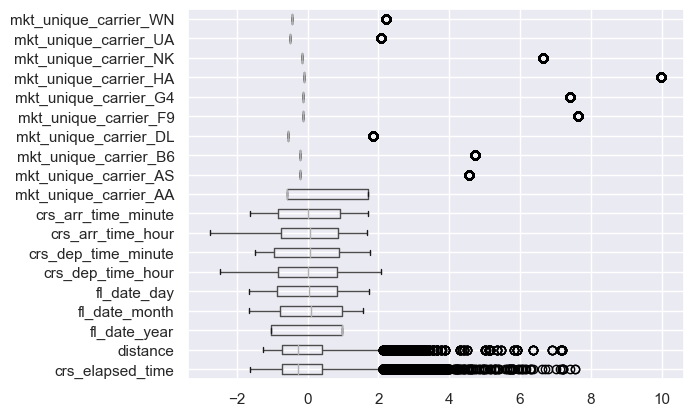

In [13]:
X_train_scaled_df.boxplot(vert=False)

In [14]:
model_comparison_linear = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='linear', deg=None)
model_comparison_linear

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
linear,24.205046,47.397377,0.012466,0.011833


In [15]:
model_comparison_ridge = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='ridge', deg=None)
model_comparison_ridge

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
ridge,24.208009,47.396986,0.012482,0.011849


In [16]:
model_comparison_lasso = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='lasso', deg=None)
model_comparison_lasso

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
lasso,24.194366,47.443012,0.010563,0.009929


In [17]:
model_comparison_poly2 = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='polynomial', deg=2)
model_comparison_poly2

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,24.170489,47.304282,0.016341,0.009324


In [99]:
model_comparison_poly3 = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='polynomial', deg=3)
model_comparison_poly3

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,24.305072,47.386719,0.01291,-0.041172


In [100]:
model_comparison_sgd = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='sgd', deg=None)
model_comparison_sgd

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
sgd,23.992324,47.43571,0.010868,0.010233


In [101]:
# model_comparison_svm = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='svm', deg=None)
# model_comparison_svm

In [102]:
model_comparison_dt = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='dt', deg=None)
model_comparison_dt

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
dt,35.723903,73.353958,-1.365324,-1.366841


In [103]:
model_comparison_rf = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='rf', deg=None)
model_comparison_rf

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
rf,24.218557,47.42669,0.011244,0.01061


In [104]:
model_comparison_gb = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='gb', deg=None)
model_comparison_gb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
gb,23.978709,47.165389,0.022109,0.021482


In [105]:
model_comparison_vr = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='vr', deg=None)
model_comparison_vr

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
vr,24.387056,47.126429,0.023724,0.023098


In [106]:
model_comparison_xgb = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='xgb', deg=None)
model_comparison_xgb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
xgb,24.50948,48.148174,-0.019068,-0.019722


In [107]:
model_comparison = pd.concat([model_comparison_linear,model_comparison_ridge,model_comparison_lasso,model_comparison_poly2,model_comparison_poly3,model_comparison_sgd,model_comparison_dt,model_comparison_rf,model_comparison_gb,model_comparison_vr,model_comparison_xgb])


In [109]:
iteration4 = model_comparison.sort_values('R Squared', ascending=False)
iteration4

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
vr,24.387056,47.126429,0.023724,0.023098
gb,23.978709,47.165389,0.022109,0.021482
polynomial,24.170489,47.304282,0.016341,0.009324
polynomial,24.305072,47.386719,0.012910,-0.041172
ridge,24.208009,47.396986,0.012482,0.011849
linear,24.205046,47.397377,0.012466,0.011833
rf,24.218557,47.426690,0.011244,0.010610
sgd,23.992324,47.435710,0.010868,0.010233
lasso,24.194366,47.443012,0.010563,0.009929
xgb,24.509480,48.148174,-0.019068,-0.019722


# Iteration 5

In [18]:
df_flights = pd.read_csv(r'..\2_data\iteration_5.csv', sep=',')
df_flights.head()

,crs_elapsed_time,distance,arr_delay,fl_date_year,fl_date_month,fl_date_day,crs_dep_time_hour,crs_dep_time_minute,crs_arr_time_hour,crs_arr_time_minute,...,op_unique_carrier_NK,op_unique_carrier_OH,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW
0,140,986,19.0,2018,1,1,19.0,30.0,23.0,50.0,...,0,0,0,0,0,0,1,0,0,0
1,150,1099,46.0,2018,1,1,21.0,25.0,15.0,5.0,...,0,0,0,0,0,0,1,0,0,0
2,150,1099,-9.0,2018,1,1,6.0,50.0,11.0,20.0,...,0,0,0,0,0,0,1,0,0,0
3,55,197,-3.0,2018,1,1,7.0,35.0,8.0,30.0,...,0,0,0,0,0,0,1,0,0,0
4,55,197,37.0,2018,1,1,17.0,40.0,18.0,35.0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
X = df_flights.drop('arr_delay',axis=1).to_numpy()
y = df_flights['arr_delay'].to_numpy()

In [20]:
def split_data(data, target=None, percent_test=0.3, dtype='array'):
    # Import train_test_split function
    from sklearn.model_selection import train_test_split

    # Split dataset into training set and test set
    if dtype == 'array':      
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=percent_test,random_state=10)
    
        print(f'X_train shape: {X_train.shape}')
        print(f'X_test shape: {X_test.shape}')
        print(f'y_train shape: {y_train.shape}')
        print(f'y_test shape: {y_test.shape}')
    
        return X_train, X_test, y_train, y_test
    
    if dtype == 'df':
        df_train, df_test = train_test_split(data, test_size=percent_test,random_state=10)

        print(f'df_train shape: {df_train.shape}')
        print(f'df_test shape: {df_test.shape}')
    
        return df_train, df_test

In [21]:
X_train, X_test, y_train, y_test = split_data(data=X, target=y)

X_train shape: (69180, 46)
X_test shape: (29649, 46)
y_train shape: (69180,)
y_test shape: (29649,)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [23]:
scaler.fit(X_train)

StandardScaler()

In [24]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=df_flights.drop('arr_delay',axis=1).columns)

In [26]:
X_train_scaled_df.head()

,crs_elapsed_time,distance,fl_date_year,fl_date_month,fl_date_day,crs_dep_time_hour,crs_dep_time_minute,crs_arr_time_hour,crs_arr_time_minute,mkt_unique_carrier_AA,...,op_unique_carrier_NK,op_unique_carrier_OH,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW
0,1.858496,1.826690,-1.035435,0.109188,0.040449,-1.242782,-0.440964,-1.139891,1.250550,1.706332,...,-0.150588,-0.179525,-0.33467,-0.113313,-0.129556,-0.286538,-0.453413,-0.162229,-0.188098,-0.114096
1,-0.835636,-0.937136,0.965777,1.277669,-0.410157,0.413973,-0.440964,0.268626,0.513956,1.706332,...,-0.150588,-0.179525,-0.33467,-0.113313,-0.129556,-0.286538,-0.453413,-0.162229,5.316386,-0.114096
2,0.099632,0.367103,-1.035435,0.109188,-1.424022,-0.000216,-0.275319,0.268626,1.080567,-0.586052,...,-0.150588,-0.179525,-0.33467,-0.113313,-0.129556,3.489936,-0.453413,-0.162229,-0.188098,-0.114096
3,0.895309,0.899724,-1.035435,0.693429,-1.536674,0.206879,0.608122,0.872276,-1.582503,-0.586052,...,6.640616,-0.179525,-0.33467,-0.113313,-0.129556,-0.286538,-0.453413,-0.162229,-0.188098,-0.114096
4,-0.556452,-0.662290,-1.035435,-1.059293,-1.649325,-1.035687,-0.661824,-1.139891,1.420533,-0.586052,...,-0.150588,-0.179525,-0.33467,-0.113313,-0.129556,-0.286538,-0.453413,6.164140,-0.188098,-0.114096


In [27]:
# X_train_scaled_df.boxplot(vert=False)

In [28]:
model_comparison_linear = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='linear', deg=None)
model_comparison_linear

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
linear,24.20328,47.350755,0.014408,0.012876


In [29]:
model_comparison_ridge = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='ridge', deg=None)
model_comparison_ridge

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
ridge,24.207374,47.349279,0.014469,0.012938


In [30]:
model_comparison_lasso = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='lasso', deg=None)
model_comparison_lasso

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
lasso,24.182525,47.424228,0.011347,0.00981


In [31]:
model_comparison_poly2 = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='polynomial', deg=2)
model_comparison_poly2

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,6816.454004,826991.948141,-3.006395e+08,-3.125302e+08


In [125]:
# model_comparison_poly3 = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='polynomial', deg=3)
# model_comparison_poly3

In [32]:
model_comparison_sgd = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='sgd', deg=None)
model_comparison_sgd

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
sgd,4.546506e+08,2.557447e+10,-2.875125e+17,-2.879592e+17


In [ ]:
# model_comparison_svm = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='svm', deg=None)
# model_comparison_svm

In [33]:
model_comparison_dt = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='dt', deg=None)
model_comparison_dt

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
dt,34.47064,69.9563,-1.151281,-1.154624


In [34]:
model_comparison_rf = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='rf', deg=None)
model_comparison_rf

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
rf,24.214892,47.423728,0.011367,0.009831


In [35]:
model_comparison_gb = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='gb', deg=None)
model_comparison_gb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
gb,23.96435,47.106163,0.024563,0.023048


In [36]:
model_comparison_vr = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='vr', deg=None)
model_comparison_vr

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
vr,24.287819,46.996295,0.029108,0.0276


In [37]:
model_comparison_xgb = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='xgb', deg=None)
model_comparison_xgb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
xgb,24.466195,47.950674,-0.010725,-0.012296


In [39]:
model_comparison = pd.concat([model_comparison_linear,model_comparison_ridge,model_comparison_lasso,model_comparison_poly2,model_comparison_sgd,model_comparison_dt,model_comparison_rf,model_comparison_gb,model_comparison_vr,model_comparison_xgb])


In [40]:
iteration5 = model_comparison.sort_values('R Squared', ascending=False)
iteration5

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
vr,2.428782e+01,4.699630e+01,2.910830e-02,2.759958e-02
gb,2.396435e+01,4.710616e+01,2.456349e-02,2.304771e-02
ridge,2.420737e+01,4.734928e+01,1.446901e-02,1.293754e-02
linear,2.420328e+01,4.735076e+01,1.440756e-02,1.287600e-02
rf,2.421489e+01,4.742373e+01,1.136740e-02,9.831112e-03
lasso,2.418252e+01,4.742423e+01,1.134658e-02,9.810263e-03
xgb,2.446619e+01,4.795067e+01,-1.072491e-02,-1.229552e-02
dt,3.447064e+01,6.995630e+01,-1.151281e+00,-1.154624e+00
polynomial,6.816454e+03,8.269919e+05,-3.006395e+08,-3.125302e+08
sgd,4.546506e+08,2.557447e+10,-2.875125e+17,-2.879592e+17


# Iteration 6

In [4]:
df_flights = pd.read_csv(r'..\2_data\iteration_6.csv', sep=',')
df_flights.head()

,crs_elapsed_time,distance,arr_delay,fl_date_year,fl_date_month,fl_date_day,crs_dep_time_hour,crs_dep_time_minute,crs_arr_time_hour,crs_arr_time_minute,...,dest_state_ TT,dest_state_ TX,dest_state_ UT,dest_state_ VA,dest_state_ VI,dest_state_ VT,dest_state_ WA,dest_state_ WI,dest_state_ WV,dest_state_ WY
0,140,986,19.0,2018,1,1,19.0,30.0,23.0,50.0,...,0,0,0,0,0,0,0,0,0,0
1,150,1099,46.0,2018,1,1,21.0,25.0,15.0,5.0,...,0,0,0,0,0,0,0,0,0,0
2,150,1099,-9.0,2018,1,1,6.0,50.0,11.0,20.0,...,0,0,0,0,0,0,0,0,0,0
3,55,197,-3.0,2018,1,1,7.0,35.0,8.0,30.0,...,0,0,0,0,0,0,0,0,0,0
4,55,197,37.0,2018,1,1,17.0,40.0,18.0,35.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = df_flights.drop('arr_delay',axis=1).to_numpy()
y = df_flights['arr_delay'].to_numpy()

In [6]:
def split_data(data, target=None, percent_test=0.3, dtype='array'):
    # Import train_test_split function
    from sklearn.model_selection import train_test_split

    # Split dataset into training set and test set
    if dtype == 'array':      
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=percent_test,random_state=10)
    
        print(f'X_train shape: {X_train.shape}')
        print(f'X_test shape: {X_test.shape}')
        print(f'y_train shape: {y_train.shape}')
        print(f'y_test shape: {y_test.shape}')
    
        return X_train, X_test, y_train, y_test
    
    if dtype == 'df':
        df_train, df_test = train_test_split(data, test_size=percent_test,random_state=10)

        print(f'df_train shape: {df_train.shape}')
        print(f'df_test shape: {df_test.shape}')
    
        return df_train, df_test

In [7]:
X_train, X_test, y_train, y_test = split_data(data=X, target=y)

X_train shape: (69180, 152)
X_test shape: (29649, 152)
y_train shape: (69180,)
y_test shape: (29649,)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [9]:
scaler.fit(X_train)

StandardScaler()

In [10]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=df_flights.drop('arr_delay',axis=1).columns)

In [12]:
X_train_scaled_df.head()

,crs_elapsed_time,distance,fl_date_year,fl_date_month,fl_date_day,crs_dep_time_hour,crs_dep_time_minute,crs_arr_time_hour,crs_arr_time_minute,mkt_unique_carrier_AA,...,dest_state_ TT,dest_state_ TX,dest_state_ UT,dest_state_ VA,dest_state_ VI,dest_state_ VT,dest_state_ WA,dest_state_ WI,dest_state_ WV,dest_state_ WY
0,1.858496,1.826690,-1.035435,0.109188,0.040449,-1.242782,-0.440964,-1.139891,1.250550,1.706332,...,-0.020122,-0.340647,-0.124862,-0.098069,-0.02635,-0.038802,-0.170623,-0.098817,-0.033812,-0.035074
1,-0.835636,-0.937136,0.965777,1.277669,-0.410157,0.413973,-0.440964,0.268626,0.513956,1.706332,...,-0.020122,-0.340647,-0.124862,-0.098069,-0.02635,-0.038802,-0.170623,-0.098817,-0.033812,-0.035074
2,0.099632,0.367103,-1.035435,0.109188,-1.424022,-0.000216,-0.275319,0.268626,1.080567,-0.586052,...,-0.020122,-0.340647,-0.124862,-0.098069,-0.02635,-0.038802,-0.170623,-0.098817,-0.033812,-0.035074
3,0.895309,0.899724,-1.035435,0.693429,-1.536674,0.206879,0.608122,0.872276,-1.582503,-0.586052,...,-0.020122,-0.340647,-0.124862,-0.098069,-0.02635,-0.038802,-0.170623,-0.098817,-0.033812,-0.035074
4,-0.556452,-0.662290,-1.035435,-1.059293,-1.649325,-1.035687,-0.661824,-1.139891,1.420533,-0.586052,...,-0.020122,-0.340647,-0.124862,-0.098069,-0.02635,-0.038802,-0.170623,-0.098817,-0.033812,-0.035074


In [13]:
# X_train_scaled_df.boxplot(vert=False)

In [14]:
model_comparison_linear = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='linear', deg=None)
model_comparison_linear

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
linear,24.145024,47.223298,0.019706,0.014655


In [15]:
model_comparison_ridge = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='ridge', deg=None)
model_comparison_ridge

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
ridge,24.149647,47.220186,0.019836,0.014785


In [16]:
model_comparison_lasso = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='lasso', deg=None)
model_comparison_lasso

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
lasso,24.172386,47.403537,0.012209,0.007119


In [54]:
# model_comparison_poly2 = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='polynomial', deg=2)
# model_comparison_poly2

In [ ]:
# model_comparison_poly3 = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='polynomial', deg=3)
# model_comparison_poly3

In [17]:
model_comparison_sgd = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='sgd', deg=None)
model_comparison_sgd

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
sgd,9.977879e+08,3.286244e+10,-4.747261e+17,-4.771725e+17


In [ ]:
# model_comparison_svm = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='svm', deg=None)
# model_comparison_svm

In [18]:
model_comparison_dt = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='dt', deg=None)
model_comparison_dt

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
dt,33.464299,68.577366,-1.067308,-1.077961


In [19]:
model_comparison_rf = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='rf', deg=None)
model_comparison_rf

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
rf,24.200439,47.396899,0.012486,0.007397


In [20]:
model_comparison_gb = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='gb', deg=None)
model_comparison_gb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
gb,23.958135,46.97842,0.029847,0.024847


In [21]:
model_comparison_vr = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='vr', deg=None)
model_comparison_vr

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
vr,23.999628,46.919858,0.032264,0.027277


In [22]:
model_comparison_xgb = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='xgb', deg=None)
model_comparison_xgb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
xgb,24.447693,48.406749,-0.030043,-0.035351


In [24]:
model_comparison = pd.concat([model_comparison_linear,model_comparison_ridge,model_comparison_lasso,model_comparison_sgd,model_comparison_dt,model_comparison_rf,model_comparison_gb,model_comparison_vr,model_comparison_xgb])


In [25]:
iteration6 = model_comparison.sort_values('R Squared', ascending=False)
iteration6

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
vr,2.399963e+01,4.691986e+01,3.226395e-02,2.727697e-02
gb,2.395814e+01,4.697842e+01,2.984672e-02,2.484729e-02
ridge,2.414965e+01,4.722019e+01,1.983560e-02,1.478457e-02
linear,2.414502e+01,4.722330e+01,1.970639e-02,1.465470e-02
rf,2.420044e+01,4.739690e+01,1.248570e-02,7.396802e-03
lasso,2.417239e+01,4.740354e+01,1.220907e-02,7.118747e-03
xgb,2.444769e+01,4.840675e+01,-3.004305e-02,-3.535111e-02
dt,3.346430e+01,6.857737e+01,-1.067308e+00,-1.077961e+00
sgd,9.977879e+08,3.286244e+10,-4.747261e+17,-4.771725e+17
